In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"saich28","key":"4fbee4ae72a63a0d1382a25fd87af4b2"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [ ]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print(f"Train shape:{x_train.shape},Test shape: {x_test.shape}")

Train shape:(60000, 28, 28),Test shape: (10000, 28, 28)


In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(f"Train reshaped:{x_train.shape}")

Train reshaped:(60000, 28, 28, 1)


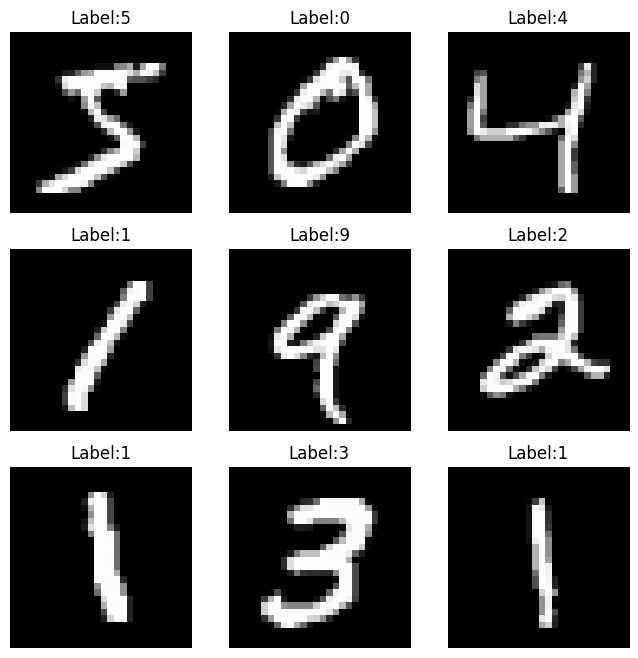

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap='gray')
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
(x_train_c10,y_train_c10),(x_test_c10,y_test_c10)=tf.keras.datasets.cifar10.load_data()
x_train_c10=x_train_c10/255.0
x_test_c10=x_test_c10/255.0
print(f"CIFAR-10 train shape:{x_train_c10.shape}")

CIFAR-10 train shape:(50000, 32, 32, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentrophy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8964 - loss: 0.3372 - val_accuracy: 0.9824 - val_loss: 0.0582
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9847 - loss: 0.0486 - val_accuracy: 0.9877 - val_loss: 0.0415
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9901 - loss: 0.0297 - val_accuracy: 0.9883 - val_loss: 0.0425
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 27ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9904 - val_loss: 0.0322
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.9954 - loss: 0.0138 - val_accuracy: 0.9888 - val_loss: 0.0401


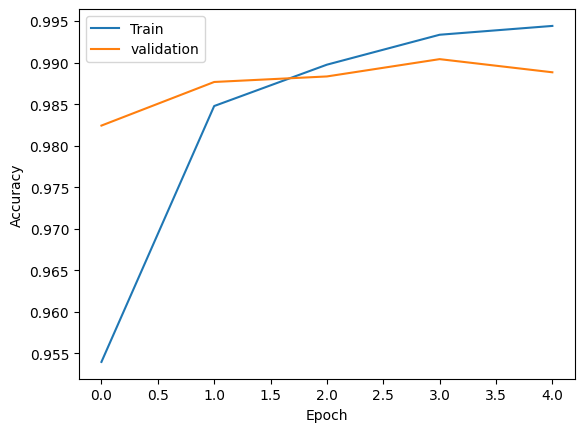

In [ ]:
plt.plot(history.history['accuracy'],label="Train")
plt.plot(history.history['val_accuracy'],label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9882 - loss: 0.0411
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
from tensorflow.keras.layers import Dropout
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentrophy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rotation_range=15,width_shift_range=0.1,
                           height_shift_range=0.1,horizontal_flip=True)
datagen.fit(x_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 76ms/step - accuracy: 0.3441 - loss: 1.7796 - val_accuracy: 0.5287 - val_loss: 1.3495
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.5241 - loss: 1.3391 - val_accuracy: 0.6018 - val_loss: 1.1248
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 73ms/step - accuracy: 0.5876 - loss: 1.1770 - val_accuracy: 0.6167 - val_loss: 1.0895
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.6172 - loss: 1.0925 - val_accuracy: 0.6030 - val_loss: 1.1767
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 73ms/step - accuracy: 0.6367 - loss: 1.0428 - val_accuracy: 0.6695 - val_loss: 0.9493
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.6520 - loss: 1.0071 - val_accuracy: 0.6936 - val_loss: 0.9036
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 113s 73ms/step - accuracy: 0.6669 - loss: 0.9578 - val_accuracy: 0.7038 - val_loss: 0.8591
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 0.6797 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1000
           1       0.87      0.83      0.85      1000
           2       0.77      0.47      0.59      1000
           3       0.62      0.44      0.52      1000
           4       0.71      0.65      0.68      1000
           5       0.70      0.58      0.64      1000
           6       0.80      0.78      0.79      1000
           7       0.59      0.88      0.71      1000
           8       0.80      0.80      0.80      1000
           9       0.63      0.91      0.75      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000



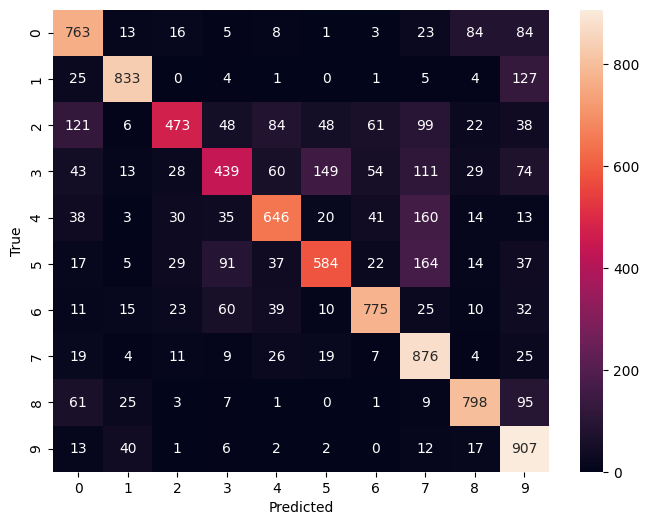

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
  )
val_generator=datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
  )


Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense
base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False
model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.7689 - loss: 0.5640 - val_accuracy: 0.7985 - val_loss: 0.5110
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.7977 - loss: 0.5005 - val_accuracy: 0.7985 - val_loss: 0.5230
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.7995 - loss: 0.4851 - val_accuracy: 0.7985 - val_loss: 0.5145
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.8054 - loss: 0.4640 - val_accuracy: 0.7835 - val_loss: 0.5583
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.8008 - loss: 0.4635 - val_accuracy: 0.7985 - val_loss: 0.5360


In [ ]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',metrics=['accuracy']
              )
model.fit(train_generator,epochs=3,validation_data=val_generator)


Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1636s 6s/step - accuracy: 0.8077 - loss: 0.4761 - val_accuracy: 0.7965 - val_loss: 0.5328
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1593s 6s/step - accuracy: 0.7986 - loss: 0.4560 - val_accuracy: 0.7930 - val_loss: 0.5330
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1588s 6s/step - accuracy: 0.8112 - loss: 0.4158 - val_accuracy: 0.7930 - val_loss: 0.5355


In [ ]:
model.save("mobilenet_cats_dogs.h5")
import tensorflow as tf
loaded_model=tf.keras.models.load_model("mobilenet_cats_dogs.h5")

63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step


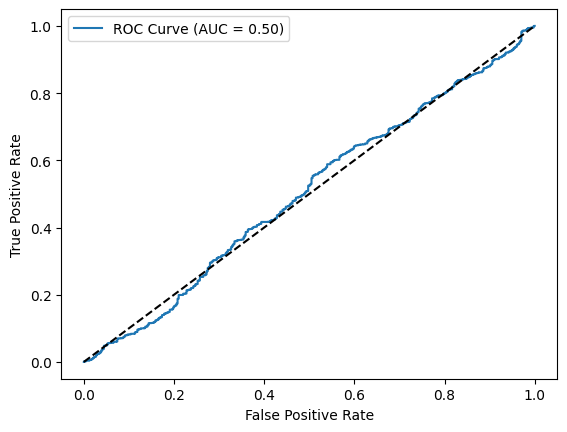

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving download.jpeg to download (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: Dog


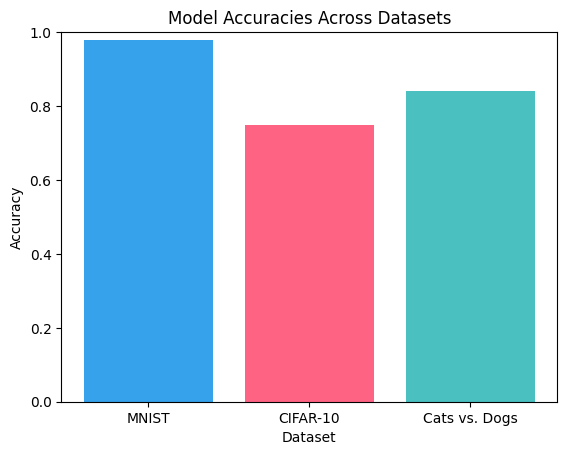

In [ ]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()